Program META (Data: Lcs-Uci) started at 16:59:15


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ludso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



"fresh" set as "False".

file datasets.pkl read successfully
Function:get_zips() started at 16:59:35
Function:get_zips() finished at 17:00:04 in 0.477471855 minutes
Function:get_zips() started at 17:00:04
Function:get_zips() finished at 17:00:04 in 0.00030580666666667845 minutes
Function:LSH-based Similarity started at 17:00:04
Processing total datasets: 110
Function:LSH-based Similarity finished at 17:00:06 in 0.02676574666666672 minutes
largest_shape == 4520
nbits == 2
110 / 4 = 27.5, samples_buckets: 27.5, prev_samples_buckets:inf
nbits == 4
110 / 16 = 6.875, samples_buckets: 6.875, prev_samples_buckets:27.5
nbits == 8
110 / 256 = 0.4296875, samples_buckets: 0.4296875, prev_samples_buckets:6.875
nbits == 16
110 / 65536 = 0.001678466796875, samples_buckets: 0.001678466796875, prev_samples_buckets:0.4296875
best_nbits == 8
Number of nodes: 110
Number of edges: 5537


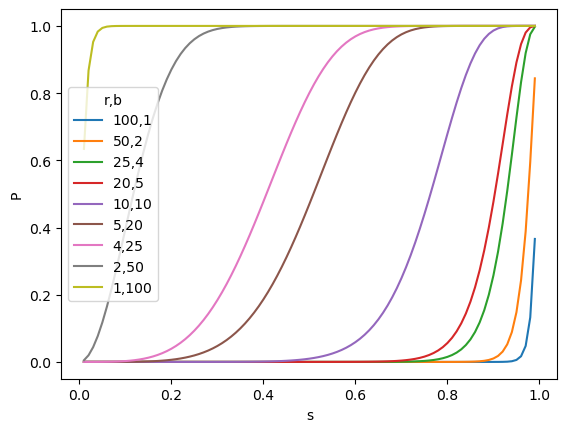

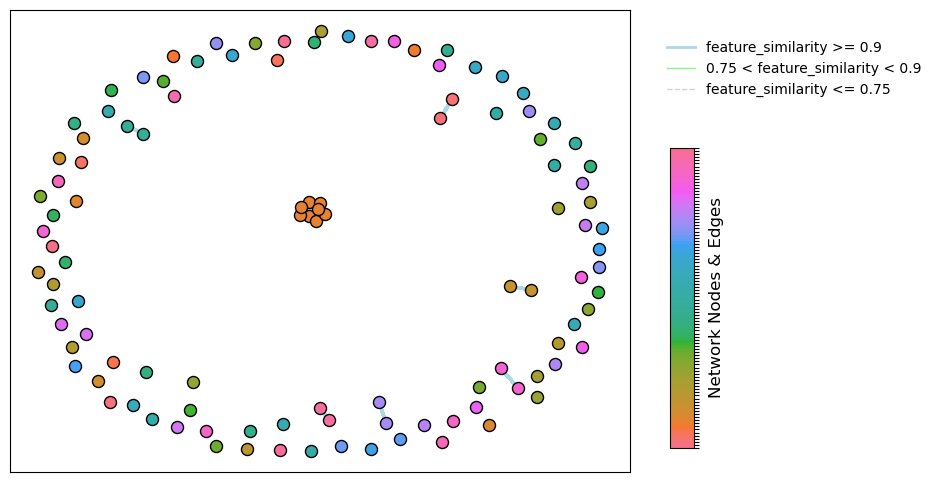

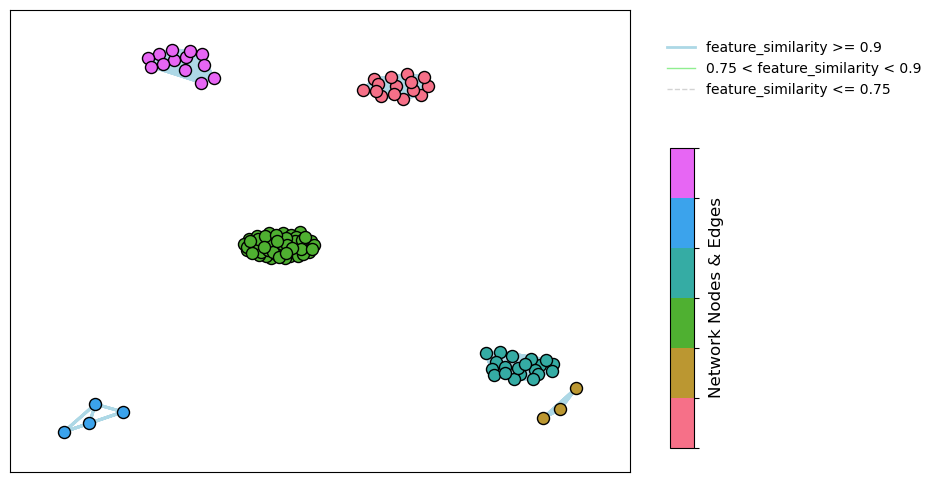

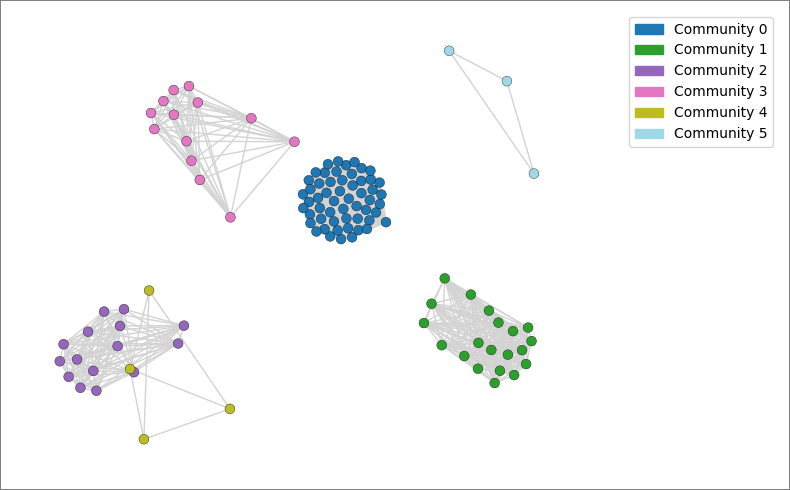

Fold 1 - Accuracy: 0.68182, Precision: 0.72078, Recall: 0.68182, F1-Score: 0.65455

Average Metrics Across Folds:
Average Accuracy: 0.13636
Average Precision: 0.14416
Average Recall: 0.13636
Average F1-Score: 0.13091
Fold 2 - Accuracy: 0.54545, Precision: 0.62879, Recall: 0.54545, F1-Score: 0.53570

Average Metrics Across Folds:
Average Accuracy: 0.24545
Average Precision: 0.26991
Average Recall: 0.24545
Average F1-Score: 0.23805
Fold 3 - Accuracy: 0.59091, Precision: 0.69091, Recall: 0.59091, F1-Score: 0.61580

Average Metrics Across Folds:
Average Accuracy: 0.36364
Average Precision: 0.40810
Average Recall: 0.36364
Average F1-Score: 0.36121
Fold 4 - Accuracy: 0.59091, Precision: 0.60455, Recall: 0.59091, F1-Score: 0.57013

Average Metrics Across Folds:
Average Accuracy: 0.48182
Average Precision: 0.52900
Average Recall: 0.48182
Average F1-Score: 0.47524
Fold 5 - Accuracy: 0.72727, Precision: 0.66970, Recall: 0.72727, F1-Score: 0.67156

Average Metrics Across Folds:
Average Accuracy: 

<Figure size 800x600 with 0 Axes>

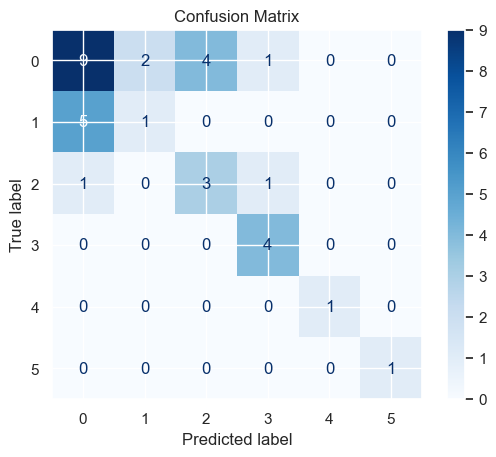

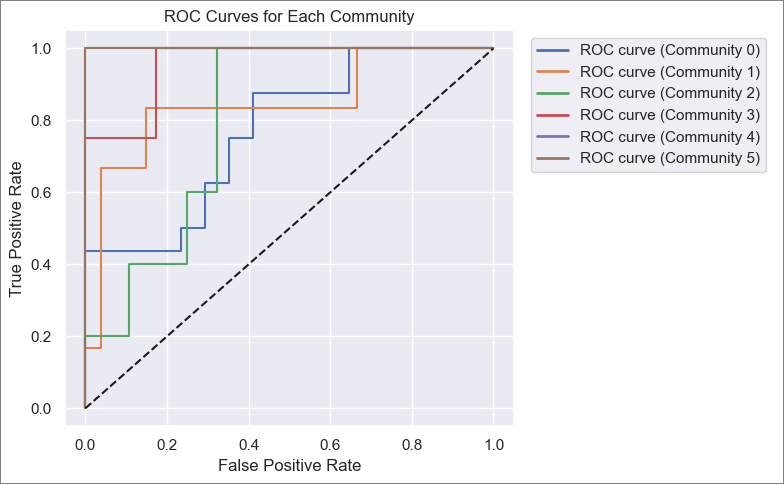

Fold 1 - Accuracy: 0.68182, Precision: 0.72078, Recall: 0.68182, F1-Score: 0.65455

Average Metrics Across Folds:
Average Accuracy: 0.13636
Average Precision: 0.14416
Average Recall: 0.13636
Average F1-Score: 0.13091
Fold 2 - Accuracy: 0.54545, Precision: 0.62879, Recall: 0.54545, F1-Score: 0.53570

Average Metrics Across Folds:
Average Accuracy: 0.24545
Average Precision: 0.26991
Average Recall: 0.24545
Average F1-Score: 0.23805
Fold 3 - Accuracy: 0.59091, Precision: 0.71616, Recall: 0.59091, F1-Score: 0.62273

Average Metrics Across Folds:
Average Accuracy: 0.36364
Average Precision: 0.41315
Average Recall: 0.36364
Average F1-Score: 0.36260
Fold 4 - Accuracy: 0.54545, Precision: 0.57424, Recall: 0.54545, F1-Score: 0.52056

Average Metrics Across Folds:
Average Accuracy: 0.47273
Average Precision: 0.52799
Average Recall: 0.47273
Average F1-Score: 0.46671
Fold 5 - Accuracy: 0.72727, Precision: 0.66970, Recall: 0.72727, F1-Score: 0.67156

Average Metrics Across Folds:
Average Accuracy: 

<Figure size 800x600 with 0 Axes>

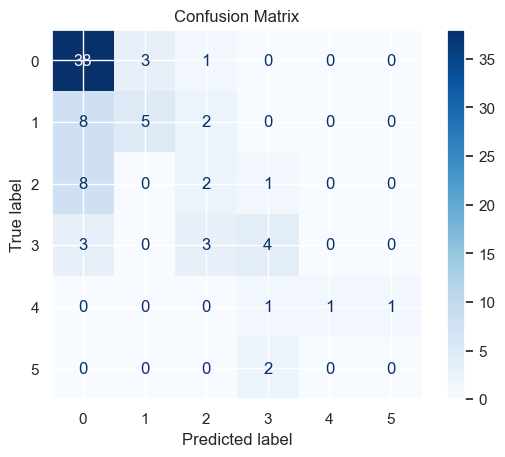

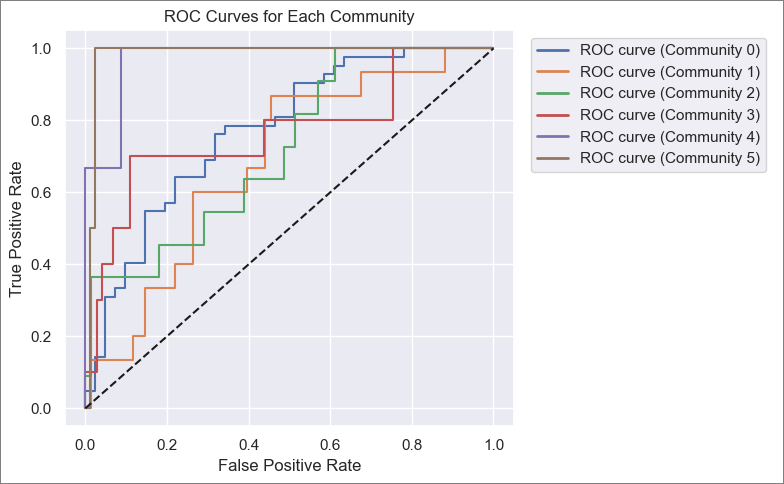

Program META (Data: Lcs-Uci) finished at 17:02:56 in 3.68663545 minutes


In [1]:
import time
import numpy as np

s_t = time.strftime("%H:%M:%S", time.localtime())
start_time = time.perf_counter()
print(f"Program META (Data: Lcs-Uci) started at {s_t}")

#preparation
%run Discovery.LSH.Networkx.Module.ipynb
# directory = "data\\ics_uci\\all\\dataset\\"
directory = "data\\ics_uci\\all\\cleaned\\dataset\\"
max_size = np.inf
encoding='ISO-8859-1'
sep = ";"
fresh = False
# fresh = True
print(f'\n"fresh" set as "{fresh}".\n')
n_hash_fs=100
n_bands = 20

#draw charts
csv_infer, datasets, ini_nodes, init_edges, merge_nodes, merge_edges = prepare(directory, fresh, encoding=encoding, sep=sep, max_size=max_size, n_hash_fs=n_hash_fs, n_bands=n_bands)

max_metadata_length=150
untrained_model, trained_kfold_model, trained_shuffle_model, communities, community_labels, feature_vocab, X, y = \
draw_all(csv_infer, datasets, ini_nodes, init_edges, merge_nodes, merge_edges, encoding=encoding, sep=sep, max_metadata_length=max_metadata_length)

#redo metrics
random_state=50
train_kfold(community_labels, X, y)

test_size=0.75
random_state=100
train_shuffle(community_labels, X, y, test_size, random_state)

finish_time = time.perf_counter()
e_t = time.strftime("%H:%M:%S", time.localtime())
print(f"Program META (Data: Lcs-Uci) finished at {e_t} in {(finish_time-start_time)/60} minutes")

In [ ]:
# !conda list igraph